In [0]:
!pip install pandas
!pip install folium
!pip install geopandas

In [269]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import folium

df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQa7xqdHPBv0l001dydV5JuDvAaUh7um07FkH3YVntOj-v43BxUcZnK3L0XgqFUXncfSA38IM77hU14/pub?gid=794529442&single=true&output=csv")
df2 = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vRELikdBBJHlgSjMkGjNP6CQL5VwxrD92vVIdMDAfi58x3VHJG0dY7SjhvhGOdt-0b42b08j-YlDBY8/pub?output=csv")
df2.head()

,lng,lat,Label
0,-78.7439,35.87432,Ebenezer Church
1,-78.8161,35.88265,Pleasant Grove Church
2,-78.7478,35.88459,Raleigh Christian Life Fellowship Church
3,-78.7778,35.88737,Mount Herman Church
4,-78.9903,35.88765,Barbees Church


In [0]:
import matplotlib.pyplot as plt
!pip install descartes
!pip install plotly
# !pip install geoplot
# import geoplot.crs as gcrs

In [0]:
def make_point(row):
    return Point(row.lng, row.lat)

def make_marker(row):
  return Markers(row.Label)
  
pointsL = df.apply(make_point, axis=1)
pickupLocations = gpd.GeoDataFrame(df, geometry=pointsL)
pickupLocations.crs = {'init': 'epsg:4326'}
# pickupLocations.head()

pointsC = df2.apply(make_point, axis=1)
churchLocations = gpd.GeoDataFrame(df2, geometry=pointsC)
churchLocations.crs = {'init': 'epsg:4326'}
churchLocations.head()

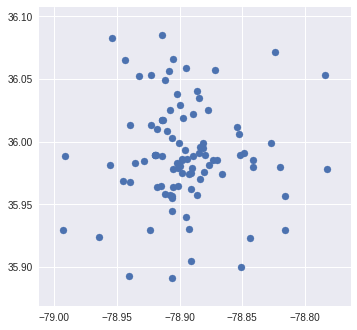

In [0]:
pickupLocations.plot()

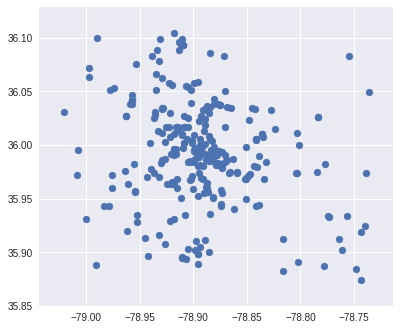

In [0]:
churchLocations.plot()

In [0]:
dcb = gpd.read_file("https://opendata.arcgis.com/datasets/01b3cb54b5a64105a742d5c5b4217599_0.geojson")
parks = gpd.read_file("http://gisweb2.durhamnc.gov/arcgis/rest/services/OpenData/ParksData/MapServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")

bounds = folium.GeoJson(dcb).get_bounds()
center = [(bounds[0][0] + bounds[1][0]) / 2, (bounds[0][1] + bounds[1][1]) / 2]
m = folium.Map(
  location=center,
  zoom_start=10,
  tiles='OpenStreetMap' 
)

# Add county boundry
folium.Choropleth(
    geo_data=dcb['geometry'],
    name='choropleth',
    fill_color='#00000000',
    fill_opacity=0.0,
    line_opacity=0.8,
    weight=1
).add_to(m)

# Red markers are churches
for index, row in churchLocations.iterrows():
  folium.CircleMarker([row['lat'], row['lng']], popup=row['Label'],color='red', fill_color='red').add_to(m) #, fill_opacity=0.2, line_opacity=0.4

# Blue markers are 2018 pickup locations
for index, row in pickupLocations.iterrows():
  folium.CircleMarker([row['lat'], row['lng']], popup=row['Label'],color='blue', fill_color='blue').add_to(m)

In [328]:
edci = gpd.read_file("https://raw.githubusercontent.com/garrisonreid/DurhamFoodLocations/master/EDCI_Zone.geojson")
edci.head()

# # Add city parks
folium.Choropleth(
    geo_data=edci['geometry'],
    name='choropleth',
    fill_color='pink',
    fill_opacity=0.6,
    line_color='pink',
    line_opacity=1.0,
    weight=1
).add_to(m)
      

In [0]:
# parks = gpd.read_file("http://gisweb2.durhamnc.gov/arcgis/rest/services/OpenData/ParksData/MapServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json")
# parks.head()

# # # Add city parks
# folium.Choropleth(
#     geo_data=parks['geometry'],
#     name='choropleth1',
#     fill_color='#efefef',
#     fill_opacity=0.2,
#     line_opacity=0.8,
#     weight=1
# ).add_to(m)

In [0]:

# blocks = gpd.read_file("https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/USA_Census_Populated_Places/FeatureServer/0/query?where=1%3D1&outFields=*&geometry=-82.312%2C35.129%2C-74.902%2C36.686&geometryType=esriGeometryEnvelope&inSR=4326&spatialRel=esriSpatialRelIntersects&outSR=4326&f=json")
# blocks.head()

# bounds = folium.GeoJson(blocks.head()).get_bounds()
# center = [(bounds[0][0] + bounds[1][0]) / 2, (bounds[0][1] + bounds[1][1]) / 2]
# m = folium.Map(
#   location=center,
#   zoom_start=10,
#   tiles='OpenStreetMap'
    
# )

# folium.Choropleth(
#     geo_data=blocks['geometry'].head(),
#     name='choropleth',
#     fill_color='#00000000',
#     fill_opacity=0.0,
#     line_opacity=0.8,
#     weight=10
# ).add_to(m)

# m

In [329]:
m